In [591]:
#load in relevant modules
import pandas as pd 
import numpy as np
import pandas as pd 
from scipy import stats 

##0 - importing the data 
myfile1='/home/bc234/Documents/BigData/diabetic_data/diabetic_data.csv'
df=pd.read_csv(myfile1)

##1 - cleaning the data 
#dropping values from the dataframe 
#print(df.shape) #show the shape of dataframe 

df.replace('?',np.nan,inplace=True) #replace ? with NaN 
df = df.replace(r'^\s*$', np.nan, regex=True) #replace empty space with NaN

min50= float(0.5*(df.shape[0]+1)) #create object with value of 50% row total
df= df.dropna(axis=1,thresh=min50) #drop columns with values missing from 50% of rows 
df.shape #one column dropped 

df.dropna(axis=0,how='any') #drop any rows with missing values 

#drop columns with 95% same values 
col_heads=list(df.columns)
df['age'].value_counts(dropna=False) #returns each value with list of counts 
min95=float(0.95*(df.shape[0]+1)) #determine 95% of values 
for title in col_heads: #for each title in col_heads 
    mylist= df[title].value_counts(dropna=False) #make a list of counts for each value found in the column
    for x in mylist: #for each value (count no. of each value in col)
        if x >= min95: #if the value is present in 95% of rows 
            df.drop(axis=1,columns=title,inplace=True)
            statement= 'dropping column: {}'.format(title)
            #print(statement)


#transforming age column to midpoint
newcol=[]
for x in df['age']:
    x=x.replace('[','')
    x=x.replace(')','')
    x2=x.split('-')
    y=int(x2[0])+5
    newcol.append(y)
df['age']=newcol

#replace NaN values in diag_1/2/3 
diag_cols=['diag_1','diag_2','diag_3']
for title in diag_cols:
    df[title]= df[title].fillna(0,inplace=False)
#df1.dtypes

#numerical and other variables from data frame to list 
col_heads=list(df.columns)
catlist= df.select_dtypes(object).columns.values.tolist()
numlist= df.select_dtypes(np.number).columns.values.tolist()

for col in numlist:
    if col[-2:]=='id':
        numlist.remove(col)
        catlist.append(col)
numlist.remove('patient_nbr')
numlist.remove('discharge_disposition_id')
#print('numerical columns are: {}\ncategorical columns are: {}'.format(numlist,catlist))
        
#drop rows with duplicate patient_nbr 
df = df.drop_duplicates(subset='patient_nbr',keep='first')

#identify and remove outliers 
df2=df.copy() #create a copy to identify outliers 
for col in numlist: #for each numerical column... 
    z= np.abs(stats.zscore(df[col])) #calculate a z score 
    df2[col]=z #define a new column with z scores 
    myindex=df2[(df2[col]>3)].index #index depending on whether or not values deviate > 3 sds from mean 
    df.drop(myindex,inplace=True) #drop all rows with numerical values > 3 sd from mean
df.shape

(64468, 33)

##  2. Data exploration
Carry out a data exploration using appropriate plots to identify 
patterns or trends in the data. Bearing in mind our objective, we need to assess the 
impact of the predictors e.g. age, race, gender, or diagnosis type on the outcome 
(readmitted). Use graphs to prove or disprove the following hypotheses:

In [592]:
df['readmitted'] = df['readmitted'].replace({'>30':'1', '<30':'1', 'NO': '0'})
dum_cols=['gender', 'race']
dummies=pd.get_dummies(df, columns=dum_cols)
df = pd.concat([df, dummies], axis = 1)
df = df.loc[:,~df.columns.duplicated()]
df.shape

(64468, 41)

In [593]:
ls = list(df['diag_1'])
def diag_1(df):
    for i, x in enumerate(df['diag_1']):
        v = str(x)
        if v[0].isalpha():
            ls[i] = v.replace(v,'other')
        elif v[0].isdigit():
            s = float(v)
            if (s > 390 and s < 460) or s == 785:#s in range(390, 460):
                p = str(s)
                ls[i] = p.replace(p,'circulatory_disease')
            elif s > 249.99 and s < 251:
                p = str(s)
                ls[i] = p.replace(p,'diabetes_mellitus')
            elif (s > 459 and s < 520) or s == 786:
                p = str(s)
                ls[i] = p.replace(p,'respiratory_disease')
            elif (s > 519 and s < 580) or s == 787:
                p = str(s)
                ls[i] = p.replace(p,'gastrointestinal_disease')
            elif (s > 799 and s < 1000):
                p = str(s)
                ls[i] = p.replace(p,'injury/poisoning')
            elif (s > 709 and s < 740):
                p = str(s)
                ls[i] = p.replace(p,'musculoskeletal/connective')
            elif (s > 579 and s < 740):
                p = str(s)
                ls[i] = p.replace(p,'genitourinary')
            elif (s > 139 and s < 240):
                p = str(s)
                ls[i] = p.replace(p,'neoplasms')
            else:
                p = str(s)
                ls[i] = p.replace(p,'other')                

    df['diag_1'] = ls
    return df['diag_1']

df['diag_1'] = diag_1(df)

ls1 = list(df['diag_2'])
def diag_2(df):
    for i, x in enumerate(df['diag_2']):
        v = str(x)
        if v[0].isalpha():
            ls1[i] = v.replace(v,'other')
        elif v[0].isdigit():
            s = float(v)
            if (s > 390 and s < 460) or s == 785:#s in range(390, 460):
                p = str(s)
                ls1[i] = p.replace(p,'circulatory_disease')
            elif s > 249.99 and s < 251:
                p = str(s)
                ls[i] = p.replace(p,'diabetes_mellitus')
            elif (s > 459 and s < 520) or s == 786:
                p = str(s)
                ls1[i] = p.replace(p,'respiratory_disease')
            elif (s > 519 and s < 580) or s == 787:
                p = str(s)
                ls1[i] = p.replace(p,'gastrointestinal_disease')
            elif (s > 799 and s < 1000):
                p = str(s)
                ls1[i] = p.replace(p,'injury/poisoning')
            elif (s > 709 and s < 740):
                p = str(s)
                ls1[i] = p.replace(p,'musculoskeletal/connective')
            elif (s > 579 and s < 740):
                p = str(s)
                ls1[i] = p.replace(p,'genitourinary')
            elif (s > 139 and s < 240):
                p = str(s)
                ls1[i] = p.replace(p,'neoplasms')
            else:
                p = str(s)
                ls1[i] = p.replace(p,'other')                

    df['diag_2'] = ls
    return df['diag_2']

df['diag_2'] = diag_2(df)

ls2 = list(df['diag_3'])
def diag_3(df):
    for i, x in enumerate(df['diag_3']):
        v = str(x)
        if v[0].isalpha():
            ls1[i] = v.replace(v,'other')
        elif v[0].isdigit():
            s = float(v)
            if (s > 390 and s < 460) or s == 785:#s in range(390, 460):
                p = str(s)
                ls2[i] = p.replace(p,'circulatory_disease')
            elif s > 249.99 and s < 251:
                p = str(s)
                ls2[i] = p.replace(p,'diabetes_mellitus')
            elif (s > 459 and s < 520) or s == 786:
                p = str(s)
                ls2[i] = p.replace(p,'respiratory_disease')
            elif (s > 519 and s < 580) or s == 787:
                p = str(s)
                ls2[i] = p.replace(p,'gastrointestinal_disease')
            elif (s > 799 and s < 1000):
                p = str(s)
                ls2[i] = p.replace(p,'injury/poisoning')
            elif (s > 709 and s < 740):
                p = str(s)
                ls2[i] = p.replace(p,'musculoskeletal/connective')
            elif (s > 579 and s < 740):
                p = str(s)
                ls2[i] = p.replace(p,'genitourinary')
            elif (s > 139 and s < 240):
                p = str(s)
                ls2[i] = p.replace(p,'neoplasms')
            else:
                p = str(s)
                ls2[i] = p.replace(p,'other')                

    df['diag_3'] = ls
    return df['diag_3']
df['diag_3'] = diag_3(df)

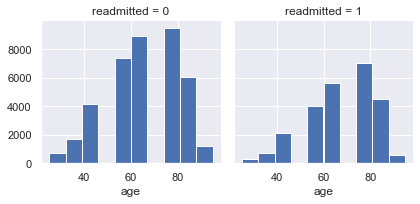

In [594]:
import matplotlib.pyplot as plt
import seaborn as sns

def readmission_hists(df, plot_cols, grid_col):
    for col in plot_cols:
        #if (col != 'encounter_id' and col != 'patient_nbr'):
        if col == 'age':
            g = sns.FacetGrid(df, col=grid_col, margin_titles=True)
            g.map(plt.hist, col)
            plt.show()
readmission_hists (df, df.select_dtypes(include=[np.number]).columns, "readmitted")

In [595]:
ls3=[]
for i, j in zip(list(df['readmitted']), list(df['gender_Male'])):
    if int(i) == int(j):
        ls3.append(i)
#print(len(ls3))
print(ls3.count('1'), 'male') # = num of men readmitted
#print(ls3.count('0'))

ls4=[]
for i, j in zip(list(df['readmitted']), list(df['gender_Female'])):
    if int(i) == int(j):
        ls4.append(i)
print(ls4.count('1'), 'female')

ls5=[]
for i, j in zip(list(df['readmitted']), list(df['race_Caucasian'])):
    if int(i) == int(j):
        ls5.append(i)
print(ls5.count('1'), 'cauc')

ls6=[]
for i, j in zip(list(df['readmitted']), list(df['race_AfricanAmerican'])):
    if int(i) == int(j):
        ls6.append(i)
print(ls6.count('1'), 'african-americ')

ls7=[]
for i, j in zip(list(df['readmitted']), list(df['race_Asian'])):
    if int(i) == int(j):
        ls7.append(i)
print(ls7.count('1'), 'asian')

ls8=[]
for i, j in zip(list(df['readmitted']), list(df['race_Hispanic'])):
    if int(i) == int(j):
        ls8.append(i)
print(ls8.count('1'), 'hispanic')

11410 male
13450 female
18997 cauc
4397 african-americ
140 asian
449 hispanic


In [596]:
print(df['gender_Male'].value_counts())
print(df['gender_Female'].value_counts())
print(df['race_Caucasian'].value_counts())
print(df['race_AfricanAmerican'].value_counts())
print(df['race_Asian'].value_counts())
print(df['race_Hispanic'].value_counts())

0    34277
1    30191
Name: gender_Male, dtype: int64
1    34274
0    30194
Name: gender_Female, dtype: int64
1    48048
0    16420
Name: race_Caucasian, dtype: int64
0    52750
1    11718
Name: race_AfricanAmerican, dtype: int64
0    64007
1      461
Name: race_Asian, dtype: int64
0    63127
1     1341
Name: race_Hispanic, dtype: int64


/home/bc234/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


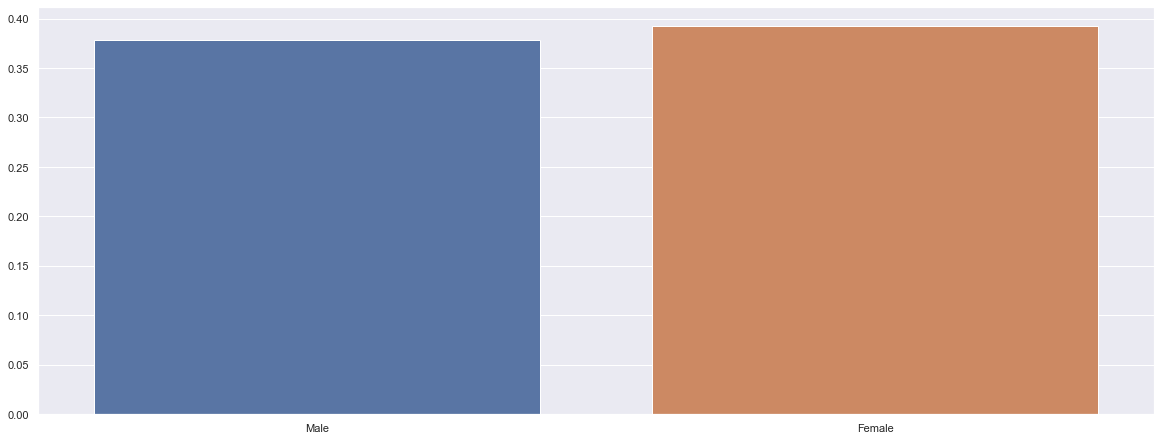

/home/bc234/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


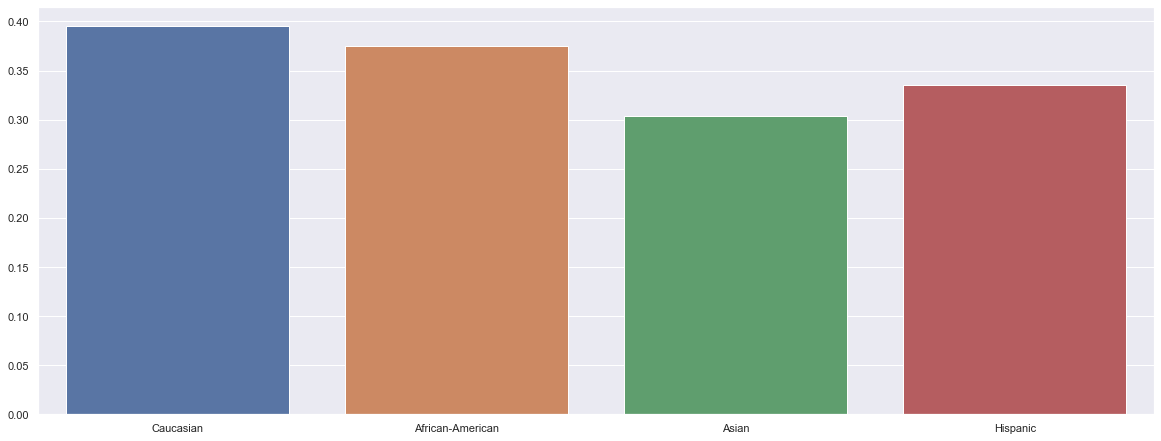

In [597]:
    #normalised --> (total of group that were readmitted)/(total of group)
x = ['Male', 'Female']
y = [11410 / 30191, 13450 / 34274]
sns.barplot(x, y)
plt.show()

x = ['Caucasian', 'African-American','Asian','Hispanic']
y = [18997/48048, 4397/11718, 140/461, 449/1341]

sns.barplot(x, y)
plt.show()

In [598]:
ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'circulatory_disease':
        ls9.append(1)
print(ls9.count(1), 'circulatory')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'respiratory_disease':
        ls9.append(1)
print(ls9.count(1), 'respiratory')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'gastrointestinal_disease':
        ls9.append(1)
print(ls9.count(1), 'gastrointestinal_disease')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'genitourinary':
        ls9.append(1)
print(ls9.count(1), 'genitourinary')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'diabetes_mellitus':
        ls9.append(1)
print(ls9.count(1), 'diabetes_mellitus')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'musculoskeletal/connective':
        ls9.append(1)
print(ls9.count(1), 'musculoskeletal/connective')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'injury/poisoning':
        ls9.append(1)
print(ls9.count(1), 'injury/poisoning')
        
ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'neoplasms':
        ls9.append(1)
print(ls9.count(1), 'neoplasms')

ls9=[]
for i, j in zip(list(df['readmitted']), list(df['diag_1'])):
    if i == '1' and j == 'other':
        ls9.append(1)
print(ls9.count(1), 'other')


#df['readmitted']

8025 circulatory
3581 respiratory
2274 gastrointestinal_disease
1926 genitourinary
1959 diabetes_mellitus
1319 musculoskeletal/connective
1603 injury/poisoning
755 neoplasms
3418 other


In [600]:
df['diag_1'].value_counts()

circulatory_disease           19652
respiratory_disease            9006
other                          8946
gastrointestinal_disease       6077
genitourinary                  5345
diabetes_mellitus              4690
injury/poisoning               4361
musculoskeletal/connective     3847
neoplasms                      2544
Name: diag_1, dtype: int64

/home/bc234/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


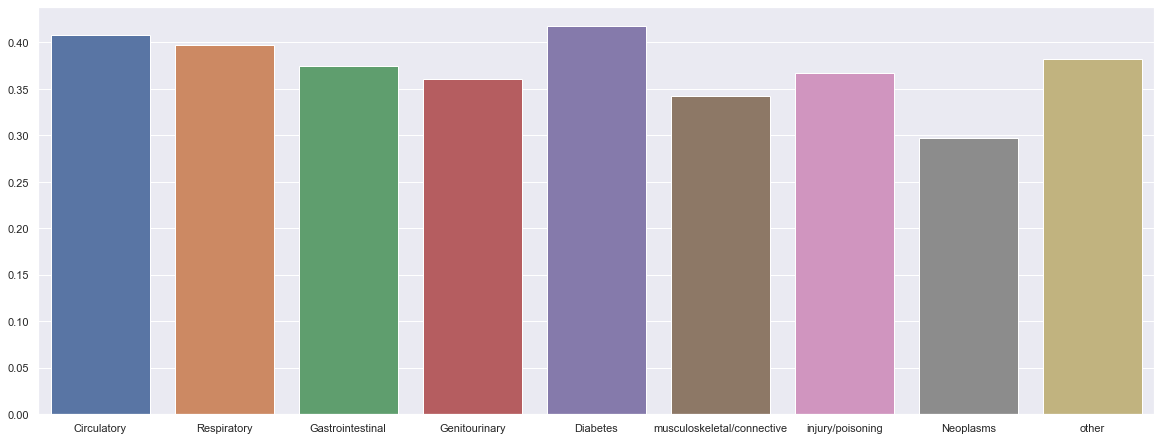

In [602]:
import seaborn as sns
#from matplotlib import pyplot
x = ['Circulatory', 'Respiratory', 'Gastrointestinal','Genitourinary','Diabetes',
    'musculoskeletal/connective', 'injury/poisoning', 'Neoplasms', 'other']
y = [8025/19652, 3581/9006, 2274/6077, 1926/5345, 1959/4690, 1319/3847, 1603/4361, 755/2544, 3418/8946]

sns.set(rc={'figure.figsize':(20,7.5)})
sns.barplot(x, y)#, height=5)
plt.show()

In [607]:
ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'circulatory_disease':
        ls11.append(1)
print(ls11.count(1), 'circulatory')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'respiratory_disease':
        ls11.append(1)
print(ls11.count(1), 'respiratory')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'gastrointestinal_disease':
        ls11.append(1)
print(ls11.count(1), 'gastrointestinal_disease')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'genitourinary':
        ls11.append(1)
print(ls11.count(1), 'genitourinary')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'diabetes_mellitus':
        ls11.append(1)
print(ls11.count(1), 'diabetes_mellitus')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'musculoskeletal/connective':
        ls11.append(1)
print(ls11.count(1), 'musculoskeletal/connective')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'injury/poisoning':
        ls10.append(1)
print(ls11.count(1), 'injury/poisoning')
        
ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'neoplasms':
        ls11.append(1)
print(ls11.count(1), 'neoplasms')

ls11=[]
for i, j in zip(list(df['readmitted']), list(df['diag_2'])):
    if i == '1' and j == 'other':
        ls11.append(1)
print(ls11.count(1), 'other')


#df['readmitted']

7012 circulatory
3047 respiratory
1937 gastrointestinal_disease
1561 genitourinary
5247 diabetes_mellitus
1031 musculoskeletal/connective
0 injury/poisoning
679 neoplasms
2928 other


In [618]:
print(df['diag_2'].value_counts())

circulatory_disease           17205
diabetes_mellitus             13691
other                          7625
respiratory_disease            7504
gastrointestinal_disease       5137
genitourinary                  4254
injury/poisoning               3870
musculoskeletal/connective     2941
neoplasms                      2241
Name: diag_2, dtype: int64


/home/bc234/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


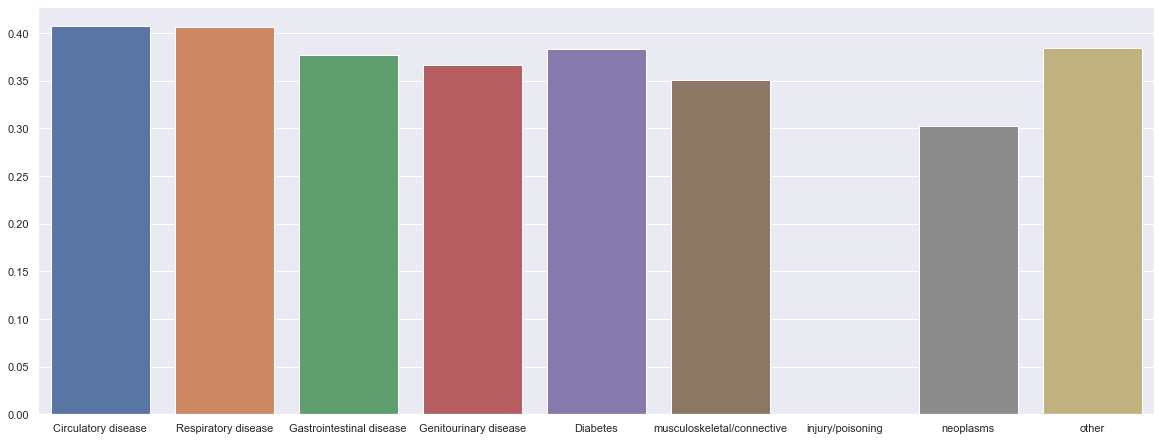

In [627]:
#DIAG 2 & 3 (same num of diagnoses)
x = ['Circulatory disease', 'Respiratory disease', 'Gastrointestinal disease','Genitourinary disease','Diabetes',
    'musculoskeletal/connective', 'injury/poisoning', 'neoplasms', 'other']
y = [7012/17205, 3047/7504, 1937/5137, 1561/4254, 5247/13691, 1031/2941, 0, 679/2241, 2928/7625]

sns.set(rc={'figure.figsize':(20,7.5)})
sns.barplot(x, y)
plt.show()

Age seems like a good predictor; race and gender less-so. The diagnosis types and their readmission rates hardly vary between each other (with the exception of diabetes) and therefore age is likely to have a higher impact on readmission.

# 3. Model Building

In [659]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import feature_selection#, metrics
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR
#df = df.loc[:,~df.columns.duplicated()] #remove duplicated 'readmitted' col
df1 = df[['encounter_id','num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 
'number_inpatient', 'age', 'num_lab_procedures', 'number_diagnoses', 
'num_procedures','diag_1', 'diag_2', 'diag_3', 'readmitted']]
df1 = df1.drop(df1.loc[df1['diag_1']!='diabetes_mellitus'].index)#, inplace=False)
df1 = df1.drop(df1.loc[df1['diag_2']!='diabetes_mellitus'].index)#, inplace=False)
df1 = df1.drop(df1.loc[df1['diag_3']!='diabetes_mellitus'].index)#, inplace=False)

model1 = linear_model.LogisticRegression()
cols = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 
'number_inpatient', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'encounter_id']

#REMOVE encounter id --> increases score slightly

X = df1[cols]
Y = df1['readmitted']
model1.fit(X, Y)

print('Model score:\n ', model1.score(X,Y))
print('Coefficients: ')
for feat, coef in zip(cols, model1.coef_[0]):
    print(feat, coef)

Model score:
  0.5823027718550107
Coefficients: 
num_medications 5.565096721386047e-17
number_outpatient 6.546760362406759e-18
number_emergency 3.0964032522218224e-18
time_in_hospital 1.3428566885161058e-17
number_inpatient 6.119579887010322e-18
age -3.232204068760208e-16
num_lab_procedures -5.87845741599117e-16
number_diagnoses 8.290846096053582e-18
num_procedures 1.9985909319967266e-17
encounter_id -2.30227203021803e-09


In [660]:
X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.25)
model2 = linear_model.LogisticRegression()
model2.fit(X_train, Y_train)
print("Score against training data: ",model2.score(X_train, Y_train))
print("Score against test data: ", model2.score(X_test, Y_test))
#scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)
#print("Cross validation mean scores: {}".format(scores.mean()))

Score against training data:  0.5771964742678419
Score against test data:  0.597612958226769


Accuracy for the training set:  0.6019677996422182
Accuracy for the test set: 0.6085790884718498
True Positive:  0
False Positive:  0
True Negative:  227
False Negative(FN) =  146
Accuracy of the binary classification =  0.6085790884718498
[[227   0]
 [146   0]]


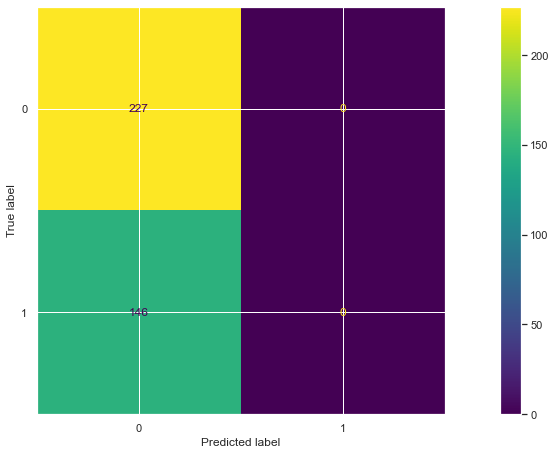

Accuracy  =   0.6085790884718498
Precision  =   0.0
Recall  =  0.0
F1_score  =  0.0


/home/bc234/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [480]:
    #CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

df1['readmitted'] = df1['readmitted'].replace({1:'1', 1:'1', 0: '0'})
#df1['readmitted'] = df1['readmitted'].replace({'1':1, '0':0})

#print(df1)
#print(df['readmitted'])#.dtype)
pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)

## Acuracy score for the training data
accuracy_train = accuracy_score(pred_train, Y_train)
print('Accuracy for the training set: ', accuracy_train)
## Acuracy score for the test data
accuracy_test = accuracy_score(pred_test, Y_test)
print('Accuracy for the test set: ', accuracy_test)


# confusion matrix for the test data
pred = pred_test
cm = confusion_matrix(Y_test, pred)

TN, FP, FN, TP = confusion_matrix(Y_test, pred_test).ravel()

print('True Positives: ', TP)
print('False Positives: ', FP)
print('True Negatives: ', TN)
print('False Negatives: ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)

print('Accuracy score = ', accuracy)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model2.classes_)
disp.plot()
plt.show()

# Calculate Accuracy, Precision and Recall Metrics for the test data
accuracy = accuracy_score(pred, Y_test)
print('Accuracy: ', accuracy)
precision = precision_score(pred, Y_test,pos_label = '1')
print('Precision: ', precision)
recall = recall_score(pred, Y_test,pos_label = '1')
print('Recall: ', recall)
f1score = f1_score(pred, Y_test,pos_label = '1')

print('F1_score: ', f1score)
plt.show()

In [210]:
    #CROSS VALIDATION
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy')
print('Cross validation mean score: ', scores.mean())

Cross validation mean scores:  0.6425400103252452


/home/bc234/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bc234/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

# Part 2 - Improved Model